# Algorithms practice

## Epsilon-Greedy (based on [tutorial from GeeksforGeeks](https://www.geeksforgeeks.org/epsilon-greedy-algorithm-in-reinforcement-learning/))

Epsilon-greedy is an algorithmic approach to maximizing rewards amid the explore-exploit tradeoff. You can either explore or exploit, not do both. An epsilon-greedy algorithm chooses to exploit most of the time, but with a small chance of exploring.

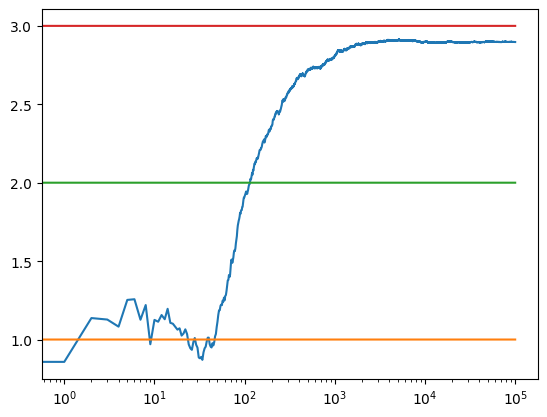

Realized mean value of action 0
1.0102395640287114
Realized mean value of action 1
1.9744414468336056
Realized mean value of action 2
3.000138912202525


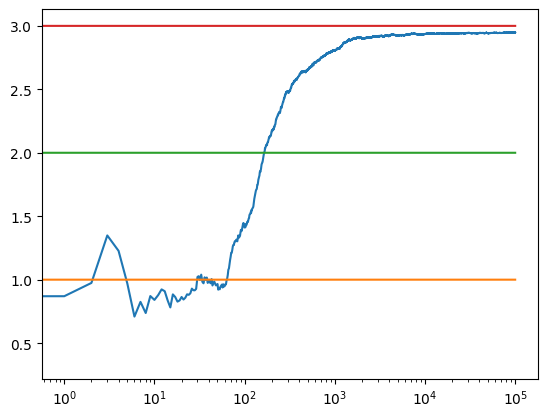

Realized mean value of action 0
1.0129850028976108
Realized mean value of action 1
2.03931739653008
Realized mean value of action 2
2.998019137788851


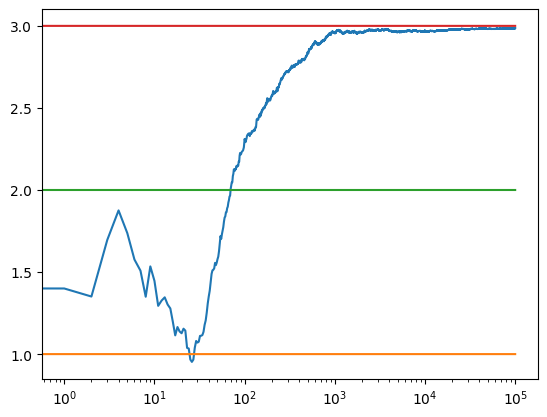

Realized mean value of action 0
0.9514924428714954
Realized mean value of action 1
2.028386610100723
Realized mean value of action 2
2.9974614839963016
Realized mean action value with an epsilon of 10%: 
2.8933698087766655
Realized mean action value with an epsilon of 5%: 
2.9367349457167626
Realized mean action value with an epsilon of 1%: 
2.9770700687885108


In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

# Define Action class 
class Actions: 
  def __init__(self, m): 
    # Expected value of taking the action (i.e., multiplier)
    self.m = m
    # Past mean value of having taken the action
    self.mean = 0
    # Action counter
    self.N = 0

  # Randomly choose a number from the standard normal distribution (mean 0, sd 1)
  # and use it to add noise to the expected value of taking the action
  def choose(self):
    return np.random.randn() + self.m 

  # Update the action counter and action-value estimate 
  def update(self, x): 
    self.N += 1
    # Use the incremental update formula for the sample mean
    # (E.g., if the current action is the tenth, we add the 9/10 the
    # previous mean to 1/10 the new action value to get the new mean)
    self.mean = (1 - 1.0 / self.N) * self.mean + (1.0 / self.N) * x 


def run_experiment(m1, m2, m3, eps, N): 
	# Intialize an array of three Action class instances (each representing a 
  # different action we could take, with a different expected value)
  actions = [Actions(m1), Actions(m2), Actions(m3)] 

  # Initialize empty array of length N
  data = np.empty(N)
    
  for i in range(N):
    # Choose a random probability 'p' from the uniform distribution from 0 to 1
    p = np.random.random()

    # If p is lower than whatever probability threshold ("espilon") we have set,
    # then "explore" by taking a random action
    if p < eps:
      # Choose a random integer from range(0,3): i.e., 0, 1, or 2
      j = np.random.choice(3)

    # Otherwise, choose the action with the highest mean realized action value
    else:
      j = np.argmax([a.mean for a in actions])

    # "Take" the selected action by generating a realized value, calculated as
    # expected value + random noise factor
    x = actions[j].choose()

    # Update the mean realized value for the action
    actions[j].update(x)

    # Add the expected value of the selected action to an array representing
    # a time series of the realized values of the actions we took
    data[i] = x 
  
  # For each data point in the time series array, calculate the cumulative
  # mean of our realized action values up to that point
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 

  # plot our realized cumulative mean against horizontal lines showing the
  # initial expected values of the three actions; use log scale
  plt.plot(cumulative_average) 
  plt.plot(np.ones(N)*m1) 
  plt.plot(np.ones(N)*m2) 
  plt.plot(np.ones(N)*m3) 
  plt.xscale('log') 
  plt.show() 

  # Print mean realized value of each action
  for i, a in enumerate(actions):
    print(f"Realized mean value of action {str(i)}")
    print(a.mean)

  # Return the mean realized value of the actions we took
  return cumulative_average

# Run the experiment with an epsilon of 10% and 100,000 turns
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

# Run the experiment with an epsilon of 5% and 100,000 turns
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)

# Run the experiment with an epsilon of 1% and 100,000 turns
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

print("Realized mean action value with an epsilon of 10%: ")
print(np.mean(c_1))
print("Realized mean action value with an epsilon of 5%: ")
print(np.mean(c_05))
print("Realized mean action value with an epsilon of 1%: ")
print(np.mean(c_01))

Across multiple trials, it generally seems to be the 1% epsilon threshold that performs best in this simulation. As a highly curious person who spends *most* of his time exploring (a dispositionally high-epsilon person), I find this a bit discouraging, but I also think it has a lot of explanatory power. There's a reason I live in abject poverty.

Of course, the optimal value of epsilon in any real-world scenario depends a great deal on the parameters: the expected values of the different options, the amount of noise, the number of remaining turns. Some advanced strategies also reduce the value of epsilon over time, to reflect that we now have better estimates of expected value and lower uncertainty, so we don't need to experiment as much.

Furthermore, the above simulation makes a couple assumptions that don't apply in most real-world situations: that we know the full set of available options (i.e., that exploration won't uncover new ones) and that expected value is stationary (e.g., that external factors like competition won't change the expected value of an action, and that). It could be argued, for instance, that in decision-making about careers or investing, expected value is highly non-stationary (and becoming moreso every day).